# Configuration du notebook

In [1]:
# Data analysis libraries
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Image processing library
from PIL import Image

# Text processing libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/cramarokoto/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Chargement des données
X_train = pd.read_csv("./../data/X_train_update.csv", index_col=0)
y_train = pd.read_csv("./../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("./../data/X_test_update.csv", index_col=0)

In [3]:
def data_info(df, name):
    df.info()
    print("\n")
    display(df.head())
    print("\n")


# Exploration des données

## Description de X_train

In [4]:
data_info(X_train, "X_train")

print("NaN values in X_train")
X_train_nan = X_train.isna().sum()
print(X_train_nan)
print("\n")

print("Nan values ratio in X_train", X_train_nan / len(X_train))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB




,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786




NaN values in X_train
designation        0
description    29800
productid          0
imageid            0
dtype: int64


Nan values ratio in X_train designation    0.000000
description    0.350935
productid      0.000000
imageid        0.000000
dtype: float64


Conformément à la description des données, seule la description est optionnelle, on remarque que le jeu de données est complet et que c'est la seule variable avec des valeurs nulles.

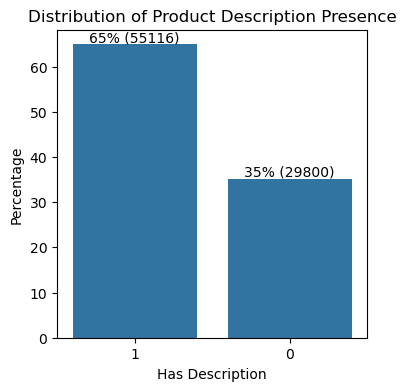

In [5]:
# Dichotomisation de la présence de description dans X_train
X_train['has_description'] = X_train['description'].notna().astype(int)

abs_values = X_train['has_description'].value_counts(ascending=False)
rel_values = X_train['has_description'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[1]:.0f}% ({p[0]})' for p in zip(abs_values, rel_values)]

# Affichage de la distribution de has_description
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=X_train, x='has_description', order=X_train['has_description'].value_counts().index, stat='percent')
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Distribution of Product Description Presence')
plt.xlabel('Has Description')
plt.ylabel('Percentage')
plt.show()

Il y a plus de produits avec une description (65 %) que de produits sans description (35%) malgré le caractère optionnel de la description. On peut supposer que cela est dû à l'importance de la description de l'article pour favoriser sa vente en plus de sa catégorisation. En effet, la description fournit d'autres éléments discriminant pour un produit dans le cadre de la recherche via un moteur parmi de nombreux produits.

## Description de y_train

In [6]:
data_info(y_train, "y_train")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   prdtypecode  84916 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB




,prdtypecode
0,10
1,2280
2,50
3,1280
4,2705


In [7]:
# Nombre de valeurs uniques dans y_train
print("Unique values in y_train")
print(y_train.nunique())

Unique values in y_train
prdtypecode    27
dtype: int64


Il existe 27 classes de produits distinctes dans le jeu de données d'apprentissage.

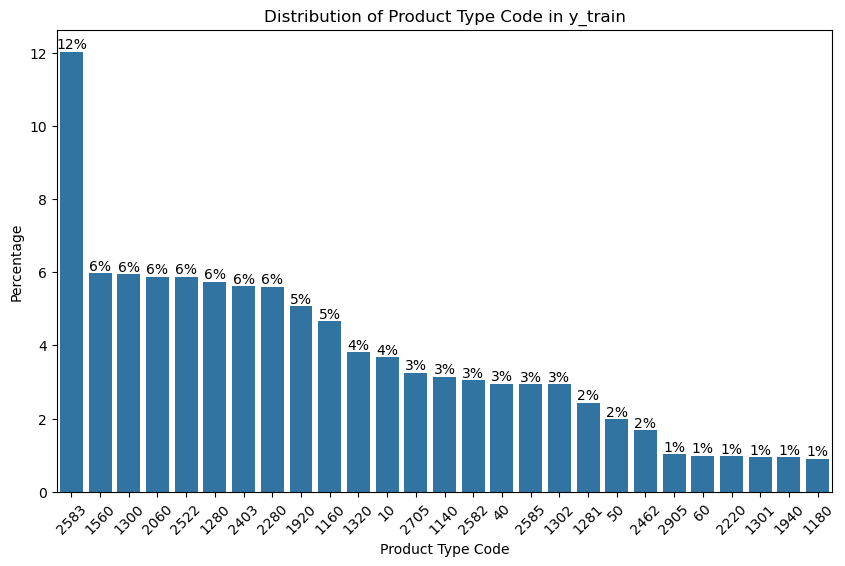

In [8]:
abs_values = y_train['prdtypecode'].value_counts(ascending=False)
rel_values = y_train['prdtypecode'].value_counts(ascending=False, normalize=True).values * 100
labels = [f'{p[1]:.0f}%' for p in zip(abs_values, rel_values)]

# Histogramme de la distribution des codes de type de produit dans y_train
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=y_train, x='prdtypecode', order=y_train['prdtypecode'].value_counts().index, stat='percent')
ax.bar_label(container=ax.containers[0], labels=labels)

plt.title('Distribution of Product Type Code in y_train')
plt.xlabel('Product Type Code')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

Le jeu de données n'est pas équilibré :
- la classe 2583 est plus représentée que les autres avec 12% du jeu de données
- les classes 1560, 1300, 2060, 2522, 1280, 2403, 2280 suivent ensuite avec 6% chacune seulement
- les classes les moins représentées (2905, 60, 2220, 1301, 1940, 1180) représentent quant à elles 1% chacune

## Analyse des variables disponibles

### Analyse croisée entre la présence de description du produit et la catégorie du produit


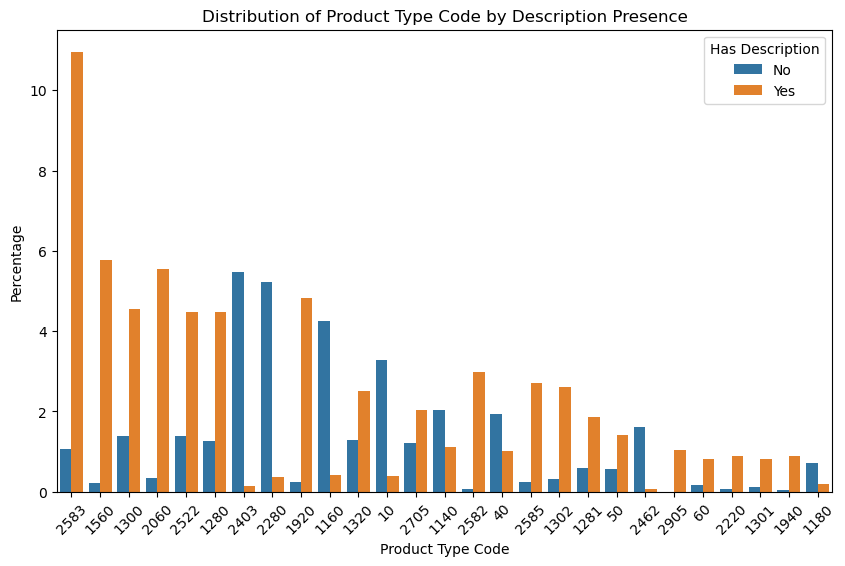

In [9]:
# Affichage de la distribution des codes de type de produit en fonction de la présence de description
plt.figure(figsize=(10, 6))
sns.countplot(data=y_train, x='prdtypecode', hue=X_train['has_description'], order=y_train['prdtypecode'].value_counts().index, stat='percent')
plt.title('Distribution of Product Type Code by Description Presence')
plt.xlabel('Product Type Code')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Has Description', loc='upper right', labels=['No', 'Yes'])
plt.show()

La répartition de produits avec ou sans description n'est pas homogène entre les catégories de produit par rapport au ratio moyen du jeu de données (65% avec et 35% sans description).
Certains produits comme 2403 contiennent majoritairement des produits non décrits alors que d'autres comme 1560 contiennent majoritairement des produits décrits.

### Analyse de la longueur de la variable 'designation'


Text(0.5, 0, 'Designation Length')

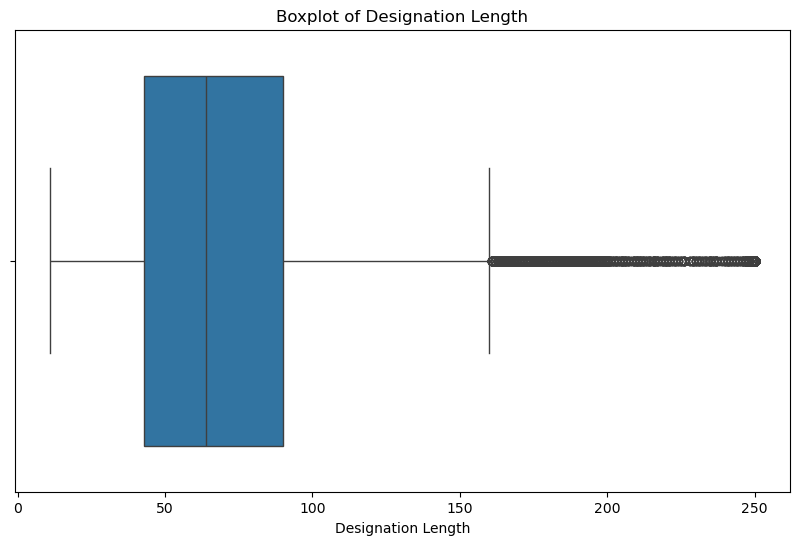

In [10]:
X_train['designation_length'] = X_train['designation'].str.len()

# Boxplot de la longueur de la variable 'designation'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='designation_length')

plt.title('Boxplot of Designation Length')
plt.xlabel('Designation Length')

In [11]:
X_train['designation_length'].describe()

count    84916.000000
mean        70.163303
std         36.793383
min         11.000000
25%         43.000000
50%         64.000000
75%         90.000000
max        250.000000
Name: designation_length, dtype: float64

On observe que la longueur de designation est très variable avec un min de 11 caractères et un max de 250 caractères.
Sa longueur moyenne est de 70 caractères et la médiane se situe à 64 caractères.
D'après le boxplot, il existe beaucoup d'outliers au dela de 160 caractères.

### Analyse croisée de la catégorie et de la longueur de la 'designation'

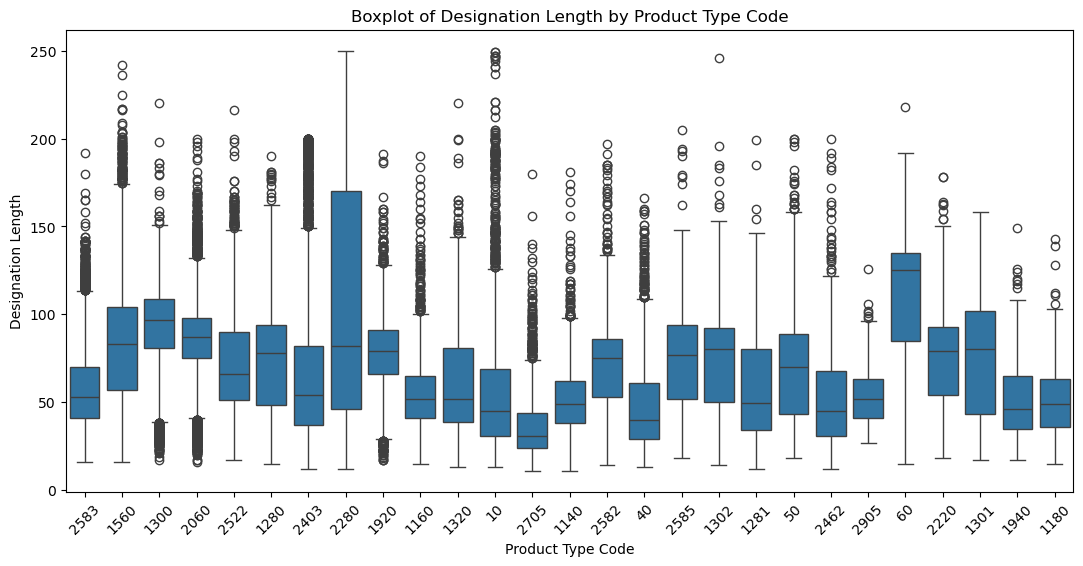

In [ ]:
# Boxplot de la longueur de la variable 'designation' par catégorie de produit
plt.figure(figsize=(13, 6))
sns.boxplot(x=y_train['prdtypecode'], y=X_train['designation_length'], order=y_train['prdtypecode'].value_counts().index)
plt.title('Boxplot of Designation Length by Product Type Code')
plt.xlabel('Product Type Code')
plt.ylabel('Designation Length')
plt.xticks(rotation=45)
plt.show()

La distribution de la longueur de Designation par catégorie de produit n'est pas homogène.

### Analyse de la longueur de la variable 'description'


Text(0.5, 0, 'Description Length')

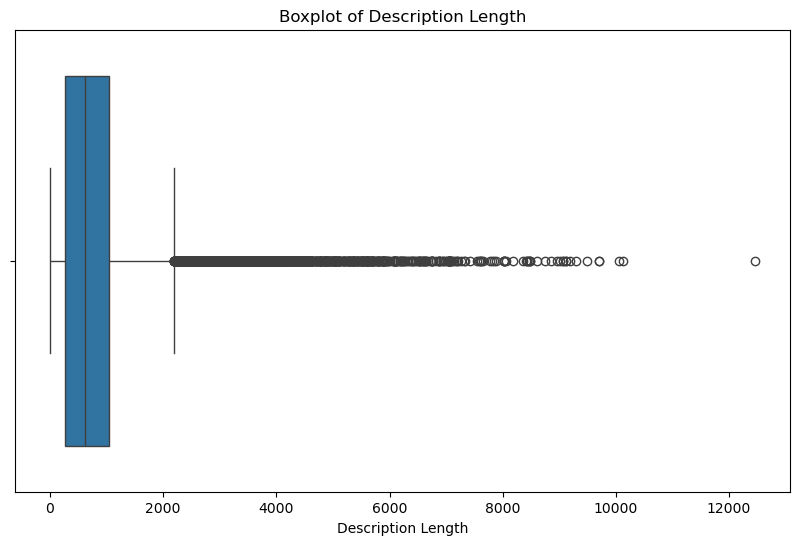

In [14]:
X_train['description_length'] = X_train['description'].str.len()

# Boxplot de la longueur de la variable 'descpription'
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train, x='description_length')

plt.title('Boxplot of Description Length')
plt.xlabel('Description Length')

In [15]:
X_train['description_length'].describe()

count    55116.000000
mean       808.171692
std        805.462153
min          1.000000
25%        259.000000
50%        626.000000
75%       1034.000000
max      12451.000000
Name: description_length, dtype: float64

On observe que la longueur de description est très variable avec un min de 1 caractères et un max de 12451 caractères.
Sa longueur moyenne est de 808 caractères et la médiane se situe à 626 caractères.
D'après le boxplot, il existe beaucoup d'outliers au dela de 2000 caractères.

### Analyse de la description par catégorie de produit

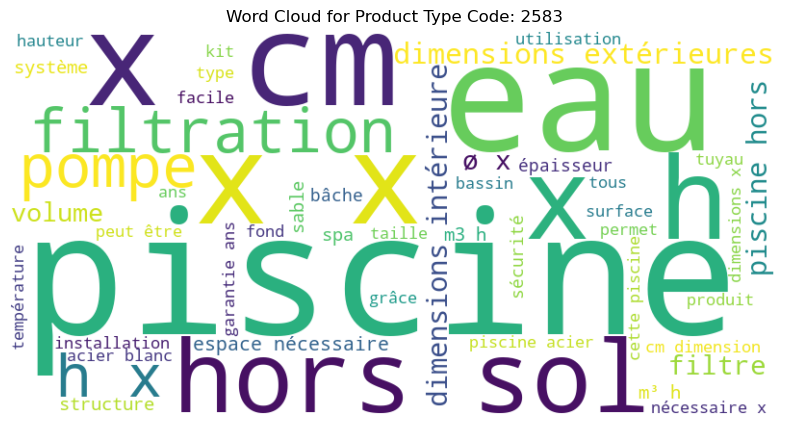

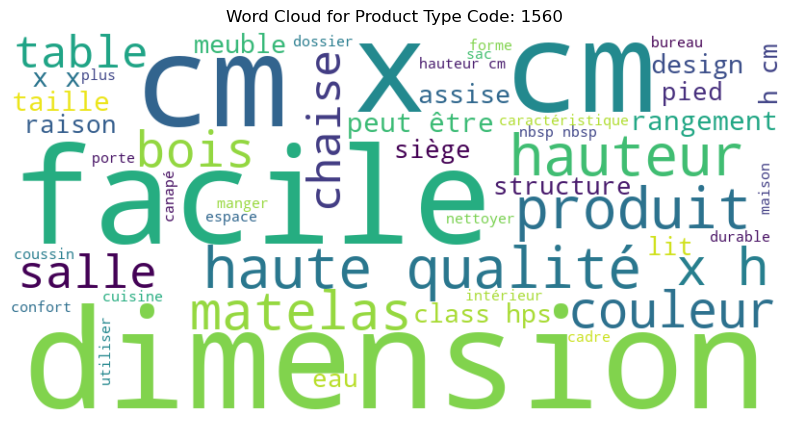

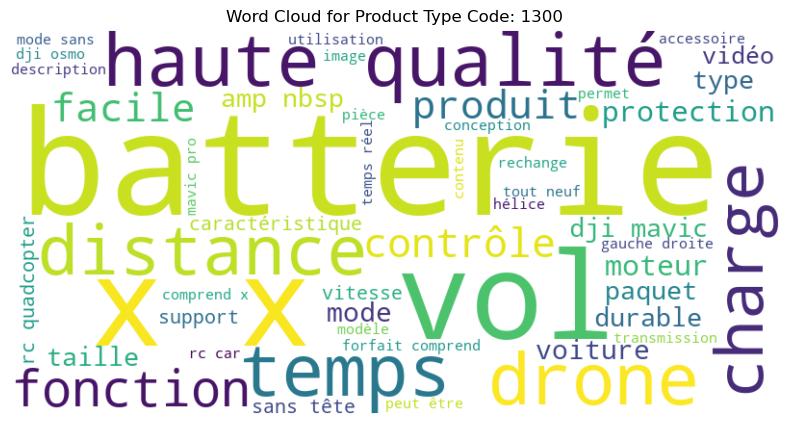

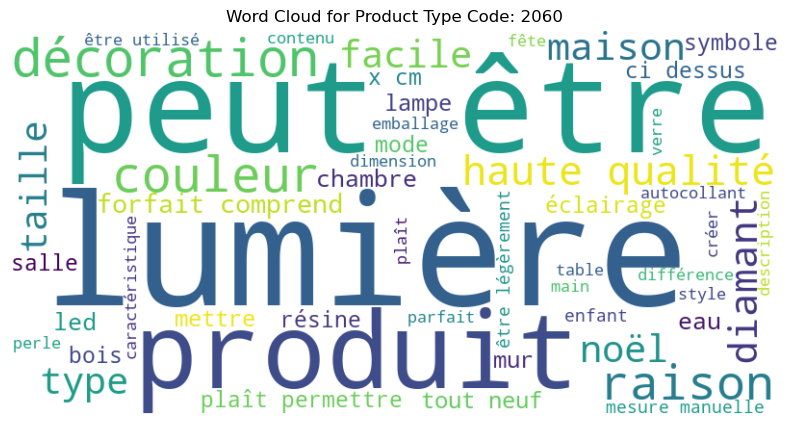

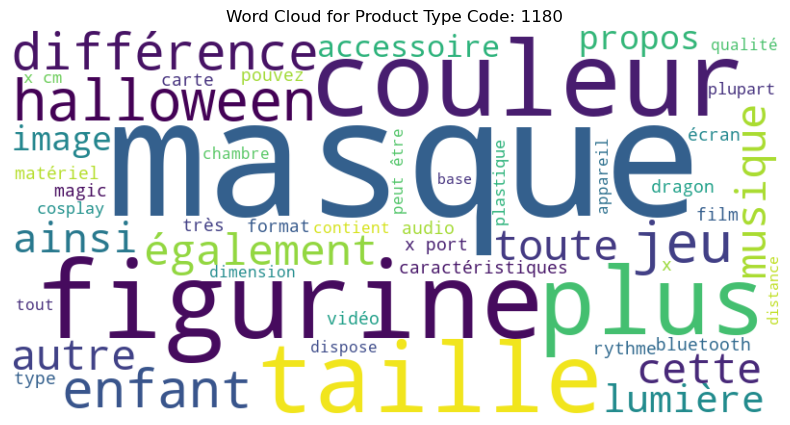

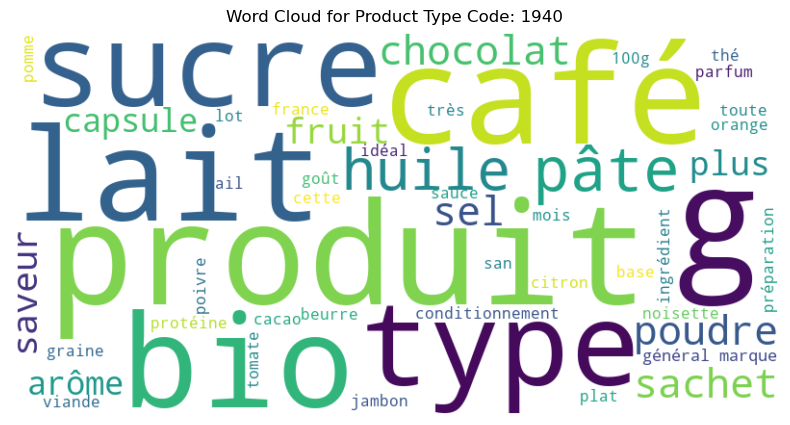

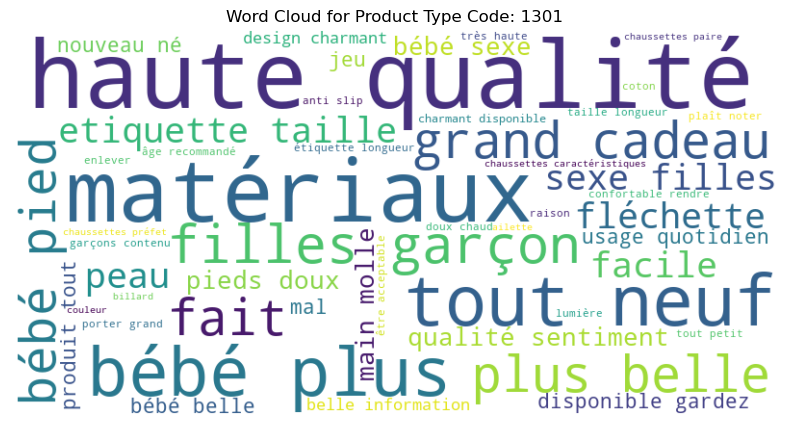

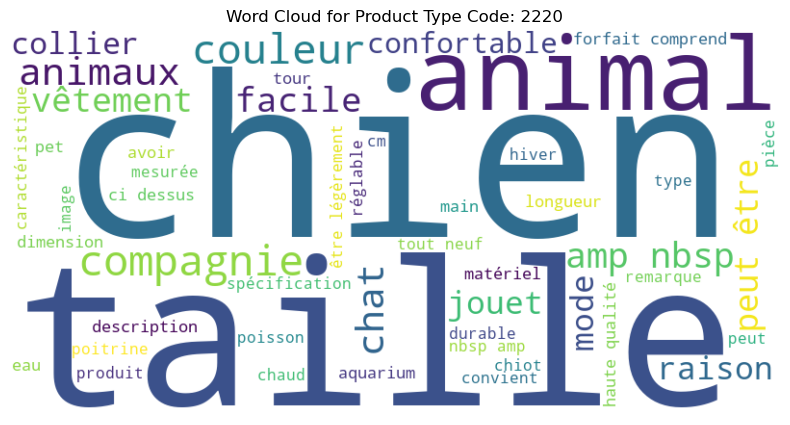

In [12]:
html_stopwords = ['br', 'p', 'div', 'span', 'b', 'i', 'li', 'ul', 'strong', 'em']
final_stopwords = stopwords.words('english') + stopwords.words('french') + html_stopwords

# Récupération des 4 catégories de produits avec le plus et le moins de descriptions pour comparaison
most_descriptions = y_train['prdtypecode'].value_counts().nlargest(4).index.tolist()
least_descriptions = y_train['prdtypecode'].value_counts().nsmallest(4).index.tolist()

# Concaténation de toutes les descriptions de chaque product code pour la création du nuage de mots
for code in most_descriptions + least_descriptions:
    text = ' '.join(X_train.loc[y_train['prdtypecode'] == code, 'description'].dropna().tolist())

    # Nettoyage du texte (apostrophes, ponctuation, etc.)
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    
    # Création du nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50, stopwords = final_stopwords).generate(text)
    
    # Affichage du nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Product Type Code: {code}')
    plt.show()